In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
datacolletion= "/content/drive/MyDrive/dataset_collection/"

In [4]:
import os
files= os.listdir(datacolletion)
print(files)

['car details v4.csv', 'CAR DETAILS FROM CAR DEKHO.csv', 'Car details v3.csv', 'car data.csv', 'car_practice_only_digit.csv', 'bar', 'customer_churn.csv']


In [5]:
dataset= f"{datacolletion}customer_churn.csv"

In [14]:
import pandas as pd
df= pd.read_csv(dataset)

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [9]:
df['InternetServiceCount'] = df.groupby('InternetService')['InternetService'].transform('count')




In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetServiceCount
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2421
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,2421
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2421
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2421
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,3096


In [11]:
grouped_df = df.groupby('InternetService').first().reset_index()

In [12]:
grouped_df.head()

,InternetService,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetServiceCount
0,DSL,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2421
1,Fiber optic,9237-HQITU,Female,0,No,No,2,Yes,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,3096
2,No,7469-LKBCI,Male,0,No,No,16,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No,1526


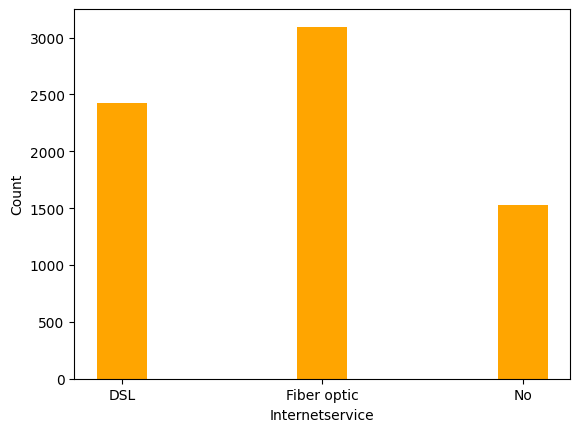

In [13]:
import matplotlib.pyplot as plt

bar_width=0.25
plt.bar(grouped_df['InternetService'] , grouped_df["InternetServiceCount"], width=bar_width,label="Stat1" , color="orange")
plt.ylabel("Count")
plt.xlabel("Internetservice")
# plt.xticks(rotation=90)
plt.show()


In [20]:
mod_df=df.copy()

In [21]:
mod_df['InternetServicetenure'] = mod_df.groupby('InternetService')['tenure'].transform('sum')

In [17]:
mod_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetServiceCount
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,79461
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,79461
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,79461
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,79461
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,101914


In [22]:
grouped_mod_df = mod_df.groupby('InternetService').first().reset_index()

In [23]:
grouped_mod_df.head()

,InternetService,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetServicetenure
0,DSL,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,79461
1,Fiber optic,9237-HQITU,Female,0,No,No,2,Yes,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,101914
2,No,7469-LKBCI,Male,0,No,No,16,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No,46615


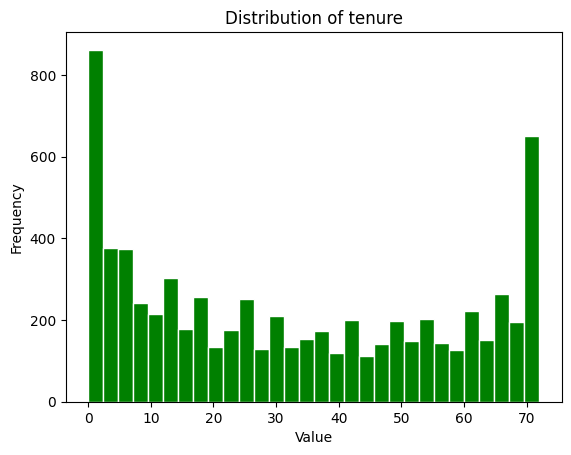

In [27]:
plt.hist(df["tenure"],bins=30, color='green', edgecolor='white')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of tenure')
plt.show()

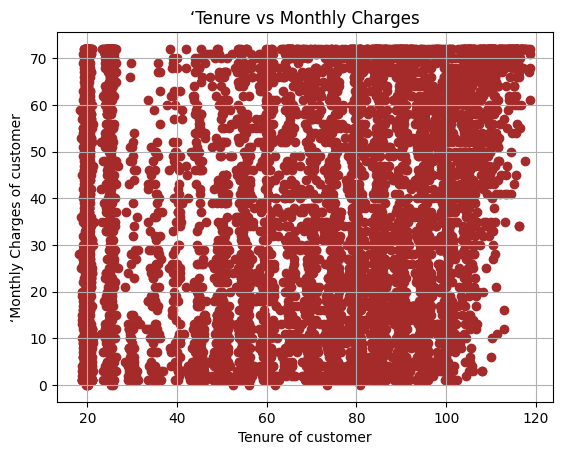

In [29]:
plt.scatter(df['MonthlyCharges'],df['tenure'] ,color="brown", marker='o')
plt.xlabel("Tenure of customer")
plt.ylabel("‘Monthly Charges of customer")
plt.title("‘Tenure vs Monthly Charges")
plt.grid(True)
plt.show()